# Librerías

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import random

In [41]:
from tools.objective_functions import max_min_dist, max_supply_demanded, balanced_supply_demanded

# Datos

In [ ]:
archive="WorkSpace 1000_50_5"
carpeta_archivo = "./data/positions/"
ruta_archivo = carpeta_archivo + archive + ".txt"

# Leer archivo

In [34]:
with open(ruta_archivo, 'r') as archivo:
    primera_linea = archivo.readline().strip()
    n, m, k = map(int, primera_linea.split())

df_sitios_a_proveer = pd.read_csv(ruta_archivo, skiprows=1, nrows=n, header=None, sep=r'\s+')
df_sitios_a_proveer.columns = ['x', 'y']  

df_sitios_de_suministro = pd.read_csv(ruta_archivo, skiprows=1+n, nrows=m, header=None, sep=r'\s+')
df_sitios_de_suministro.columns = ['x', 'y']

# Mostrar datos

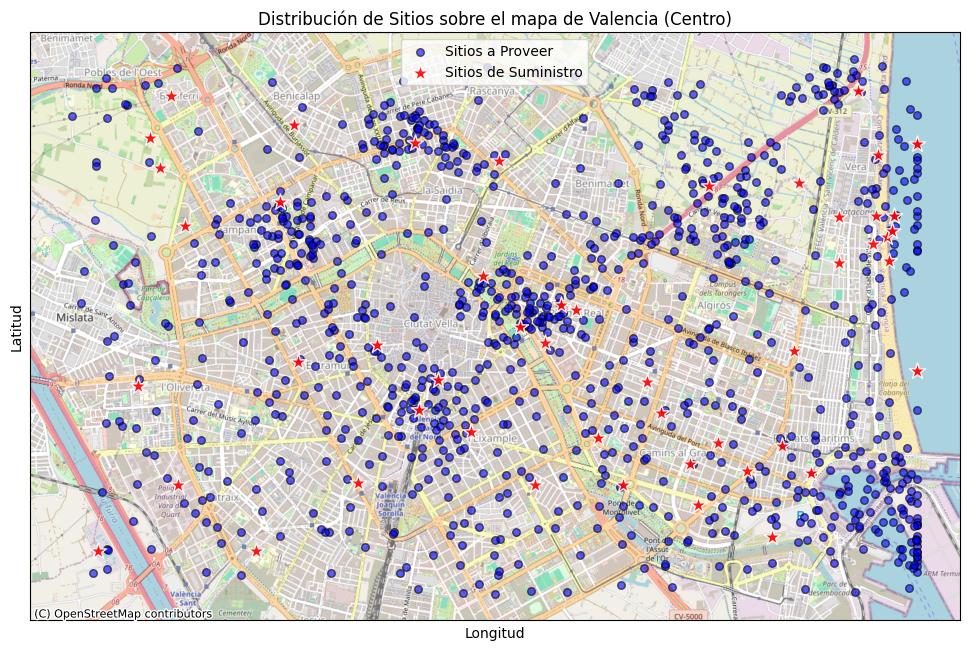

In [35]:
valencia_bounds = {
    'lon_min': -0.42, 'lon_max': -0.32,
    'lat_min': 39.45, 'lat_max': 39.50
}
# =============================================================

# Convertimos tus coordenadas (x, y) a las nuevas coordenadas geográficas.
df_sitios_a_proveer['lon'] = np.interp(df_sitios_a_proveer['x'], (0, 1400), (valencia_bounds['lon_min'], valencia_bounds['lon_max']))
df_sitios_a_proveer['lat'] = np.interp(df_sitios_a_proveer['y'], (0, 1000), (valencia_bounds['lat_min'], valencia_bounds['lat_max']))

df_sitios_de_suministro['lon'] = np.interp(df_sitios_de_suministro['x'], (0, 1400), (valencia_bounds['lon_min'], valencia_bounds['lon_max']))
df_sitios_de_suministro['lat'] = np.interp(df_sitios_de_suministro['y'], (0, 1000), (valencia_bounds['lat_min'], valencia_bounds['lat_max']))

# Creamos los GeoDataFrames.
gdf_proveer = gpd.GeoDataFrame(
    df_sitios_a_proveer,
    geometry=gpd.points_from_xy(df_sitios_a_proveer.lon, df_sitios_a_proveer.lat),
    crs="EPSG:4326"
)

gdf_suministro = gpd.GeoDataFrame(
    df_sitios_de_suministro,
    geometry=gpd.points_from_xy(df_sitios_de_suministro.lon, df_sitios_de_suministro.lat),
    crs="EPSG:4326"
)

# --- 3. Creación del Gráfico con Mapa ---
fig, ax = plt.subplots(figsize=(12, 10))

# Proyectamos los datos a Web Mercator (EPSG:3857).
gdf_proveer_web = gdf_proveer.to_crs(epsg=3857)
gdf_suministro_web = gdf_suministro.to_crs(epsg=3857)

# Dibujamos los puntos en el mapa.
gdf_proveer_web.plot(
    ax=ax,
    color='blue',
    label='Sitios a Proveer',
    alpha=0.6,
    marker='o',  # 'o' especifica que el marcador es un círculo
    markersize=30, # Tamaño más pequeño
    edgecolor='black'
)

# ===== CAMBIO AQUÍ: Puntos más pequeños y de color azul =====
gdf_suministro_web.plot(
    ax=ax,
    color='red',
    label='Sitios de Suministro',
    alpha=0.9,
    marker='*',  # '*' especifica que el marcador es una estrella
    markersize=150, # Tamaño notablemente más grande
    edgecolor='white'
)
# ==========================================================

# Configuramos etiquetas, título y leyenda.
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Distribución de Sitios sobre el mapa de Valencia (Centro)')
ax.legend()

# Añadimos el mapa de fondo de OpenStreetMap.
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=14) # Podemos forzar un nivel de zoom

# Ocultamos los ejes con coordenadas Mercator.
ax.set_xticks([])
ax.set_yticks([])

# Mostrar el gráfico.
plt.show()

In [36]:
valencia_bounds = {
    'lon_min': -0.42, 'lon_max': -0.32,
    'lat_min': 39.45, 'lat_max': 39.50
}

In [37]:
indices_a_destacar = [3, 9, 12, 28, 30]

In [38]:
indices_a_destacar=random.sample(range(m), 5)
print(indices_a_destacar)

[45, 41, 12, 38, 43]


In [42]:
route_distances="./data/distances/demand/"+archive+".csv"
df_distances_demand = pd.read_csv(route_distances, index_col=0)

In [44]:
f1=max_min_dist(df_distances_demand, indices_a_destacar)
f2=max_supply_demanded(df_distances_demand, indices_a_destacar)
f3=balanced_supply_demanded(df_distances_demand, indices_a_destacar)

In [45]:
print(f1,f2,f3)

650.3575939435166 313 213


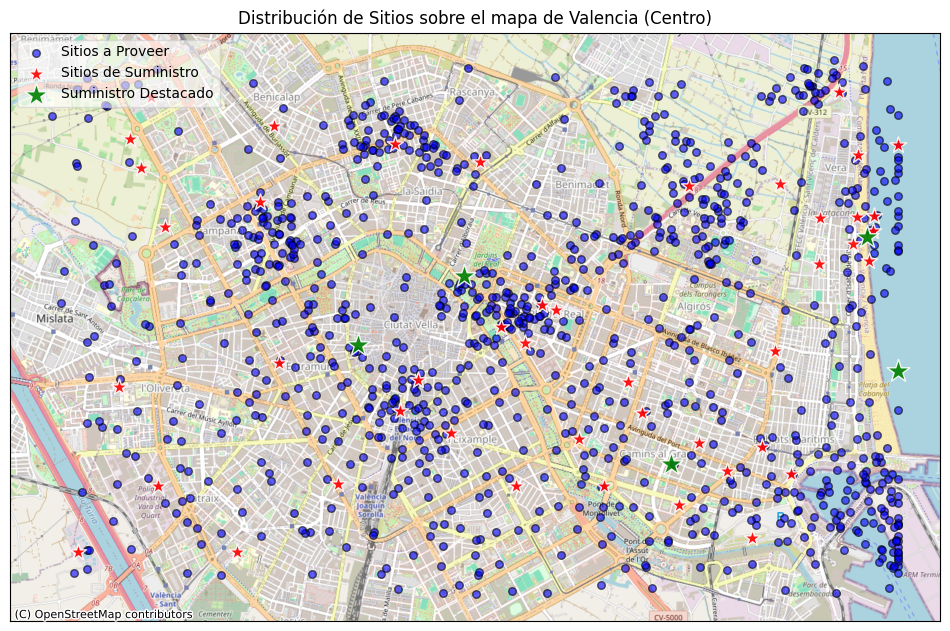

In [40]:


# Conversión de coordenadas para ambos dataframes
df_sitios_a_proveer['lon'] = np.interp(df_sitios_a_proveer['x'], (0, 1400), (valencia_bounds['lon_min'], valencia_bounds['lon_max']))
df_sitios_a_proveer['lat'] = np.interp(df_sitios_a_proveer['y'], (0, 1000), (valencia_bounds['lat_min'], valencia_bounds['lat_max']))

df_sitios_de_suministro['lon'] = np.interp(df_sitios_de_suministro['x'], (0, 1400), (valencia_bounds['lon_min'], valencia_bounds['lon_max']))
df_sitios_de_suministro['lat'] = np.interp(df_sitios_de_suministro['y'], (0, 1000), (valencia_bounds['lat_min'], valencia_bounds['lat_max']))

# Creación de GeoDataFrames
gdf_proveer = gpd.GeoDataFrame(
    df_sitios_a_proveer,
    geometry=gpd.points_from_xy(df_sitios_a_proveer.lon, df_sitios_a_proveer.lat),
    crs="EPSG:4326"
)
gdf_suministro = gpd.GeoDataFrame(
    df_sitios_de_suministro,
    geometry=gpd.points_from_xy(df_sitios_de_suministro.lon, df_sitios_de_suministro.lat),
    crs="EPSG:4326"
)

# Proyección a Web Mercator
gdf_proveer_web = gdf_proveer.to_crs(epsg=3857)
gdf_suministro_web = gdf_suministro.to_crs(epsg=3857)

# 2. Crea dos nuevos GeoDataFrames: uno con los puntos a destacar y otro con el resto.
gdf_suministro_destacados = gdf_suministro_web.loc[indices_a_destacar]
gdf_suministro_normales = gdf_suministro_web.drop(indices_a_destacar)

fig, ax = plt.subplots(figsize=(12, 10))


gdf_proveer_web.plot(ax=ax, color='blue', label='Sitios a Proveer', alpha=0.6, marker='o', markersize=30, edgecolor='black')
gdf_suministro_normales.plot(ax=ax, color='red', label='Sitios de Suministro', alpha=0.9, marker='*', markersize=150, edgecolor='white')
gdf_suministro_destacados.plot(ax=ax, color='green', label='Suministro Destacado', alpha=0.9, marker='*', markersize=300, edgecolor='white')

# Configuración del gráfico
ax.set_title('Distribución de Sitios sobre el mapa de Valencia (Centro)')
ax.legend(loc='upper left', framealpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=14)
ax.set_xticks([])
ax.set_yticks([])

# Mostrar el gráfico
plt.show()